In [ ]:
#此部分為將兩天資料融合結果

In [125]:
import os 
import sys

import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor, XGBClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, mean_absolute_error

sys.path.append(r"c:\Users\keng-tse\Desktop\csi_tool") #這行為絕對路徑，如需使用，必須要修改為當前決路徑
import csi_tool

In [133]:
files_labels = {
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\2p.xlsx": 2,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\3p.xlsx": 3,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\4p.xlsx": 4,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\5p.xlsx": 5,
}

test_labels = {
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\2p.xlsx": 2,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\3p.xlsx": 3,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\4p.xlsx": 4,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\5p.xlsx": 5,

}

In [135]:
def load_data(files_labels):
    data = []
    labels = []
    
    for file, label in files_labels.items():
        df = pd.read_excel(file)
        data.append(df.values)
        labels.extend([label] * len(df))  #Label all rows with the given label
    
    data = pd.DataFrame(np.vstack(data))  #Stack data vertically

    print(data)
    labels = pd.Series(labels)
    return data, labels

In [137]:
# 載入數據
# 載入數據
data_scaled, labels = load_data(files_labels)
data_scaled_under, labels_under = load_data(test_labels)
# Concatenate the data DataFrames and label Series
data_scaled_under = pd.concat([data_scaled, data_scaled_under], axis=0, ignore_index=True)
labels_under = pd.concat([labels, labels_under], axis=0, ignore_index=True)

              0           1           2           3           4           5   \
0     294.703241  299.766576  304.507800  312.827428  310.961412  330.492057   
1     300.566132  303.211148  306.757233  302.483057  309.583591  330.629702   
2     299.821614  302.654919  301.303833  306.887602  307.605267  327.940543   
3     294.966100  302.364019  304.138127  307.883095  309.457590  328.811496   
4     435.983945  433.018475  438.346895  439.602093  454.757078  480.010417   
...          ...         ...         ...         ...         ...         ...   
4117  480.417527  480.884602  479.963540  478.658542  478.724347  478.452714   
4118  493.328491  485.000000  478.023012  473.600042  481.009355  482.346349   
4119  487.017453  489.540601  485.759200  479.009394  474.368001  477.177116   
4120  491.562814  486.065839  484.372790  480.550726  478.271889  474.843132   
4121  486.054524  488.878308  483.205960  478.150604  473.469112  483.662072   

              6           7           8

In [141]:

# PCA降維
#n_components = 3  # 要保留的主成分數量
pca = PCA(n_components=n_components)
#data_pca = pca.fit_transform(data_scaled)
#data_pca_under = pca.fit_transform(data_scaled_under)
#important_features = np.argmax(np.abs(pca.components_), axis=1)



X_train, X_test, y_train, y_test = train_test_split(data_scaled_under, labels_under, test_size=0.4, random_state=2)
#smote = SMOTE()
#X_train, y_train = smote.fit_resample(X_train, y_train)
#knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train, y_train)

#rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
#rf_model.fit(X_train, y_train)

#X_train, y_train =  data_pca, labels
#X_test, y_test = data_pca_under, labels_under
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

 # 預測
#y_pred = knn.predict(X_test)
#y_pred = xgb_model.predict(X_test)
#y_pred = rf_model.predict(X_test)
y_pred = xgb_model.predict(X_test)

# 混淆矩陣和準確率
print("==========", 3)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
    
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


========== 3
Confusion Matrix:
 [[516   2   0   0   0   0]
 [  0 360   5   0   2   0]
 [  0   4 452   0   2   0]
 [  0   0   1 429   0   1]
 [  0   3   0   0 689   2]
 [  0   2   0   1   5 428]]
Accuracy: 98.97%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       0.97      0.98      0.98       367
           2       0.99      0.99      0.99       458
           3       1.00      1.00      1.00       431
           4       0.99      0.99      0.99       694
           5       0.99      0.98      0.99       436

    accuracy                           0.99      2904
   macro avg       0.99      0.99      0.99      2904
weighted avg       0.99      0.99      0.99      2904



In [32]:
xgb_reg_model = XGBRegressor(eval_metric='rmse')
xgb_reg_model.fit(X_train, y_train)

# Prediction for regression
y_pred_reg = xgb_reg_model.predict(X_test)

# Mean squared error for regression
mse = mean_squared_error(y_test, y_pred_reg)
print("\n========== Regression Results ==========")
print(f"Mean Squared Error: {mse:.2f}")


========== Regression Results ==========
Mean Squared Error: 0.08


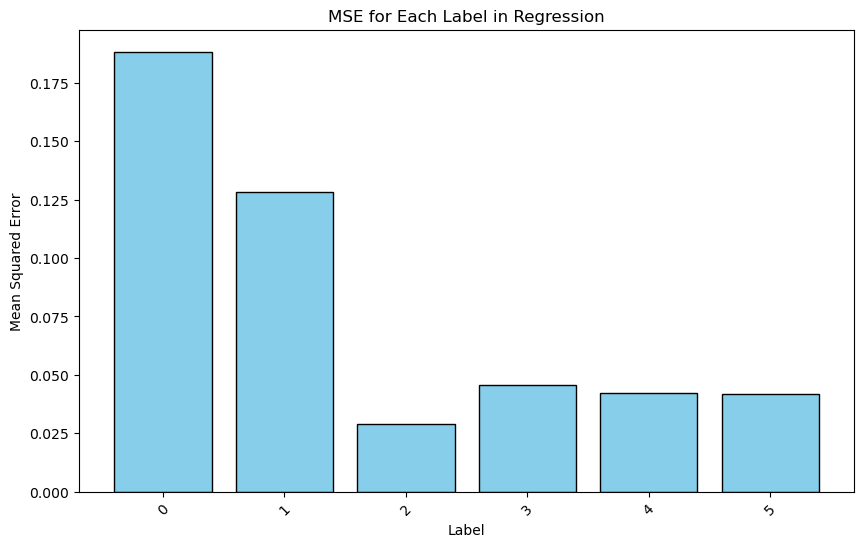

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure y_test and y_pred_reg are numpy arrays if they're pandas Series
y_test = np.array(y_test)  # Convert y_test to numpy if it's a pandas Series
y_pred_reg = np.array(y_pred_reg)  # Convert y_pred_reg to numpy if it's a pandas Series

# Calculate MSE for each label
labels_unique = np.unique(y_test)  # Assuming 'y_test' contains categorical labels (discrete labels)
mse_per_label = []

for label in labels_unique:
    # Get the indices where the label occurs in the true labels
    indices = np.where(y_test == label)[0]  # Extract the first element of the tuple (indices)
    
    # Get the true and predicted values for this label
    y_true_label = y_test[indices]
    y_pred_label = y_pred_reg[indices]
    
    # Calculate MSE for this label
    mse = mean_squared_error(y_true_label, y_pred_label)
    mse_per_label.append(mse)

# Plotting the MSE per label
plt.figure(figsize=(10, 6))
plt.bar(labels_unique, mse_per_label, color='skyblue', edgecolor='black')
plt.title('MSE for Each Label in Regression')
plt.xlabel('Label')
plt.ylabel('Mean Squared Error')
plt.xticks(labels_unique, rotation=45)  # Rotate x-axis labels if needed for clarity
plt.show()



In [40]:
print(y_test)

[0 4 4 ... 0 0 1]


In [42]:
y_pred_reg

array([3.7527794e-03, 4.0028105e+00, 4.0027480e+00, ..., 7.2670565e-03,
       5.9237750e-03, 1.0132276e+00], dtype=float32)

In [48]:
# 以下維PCA之後資料分布情況

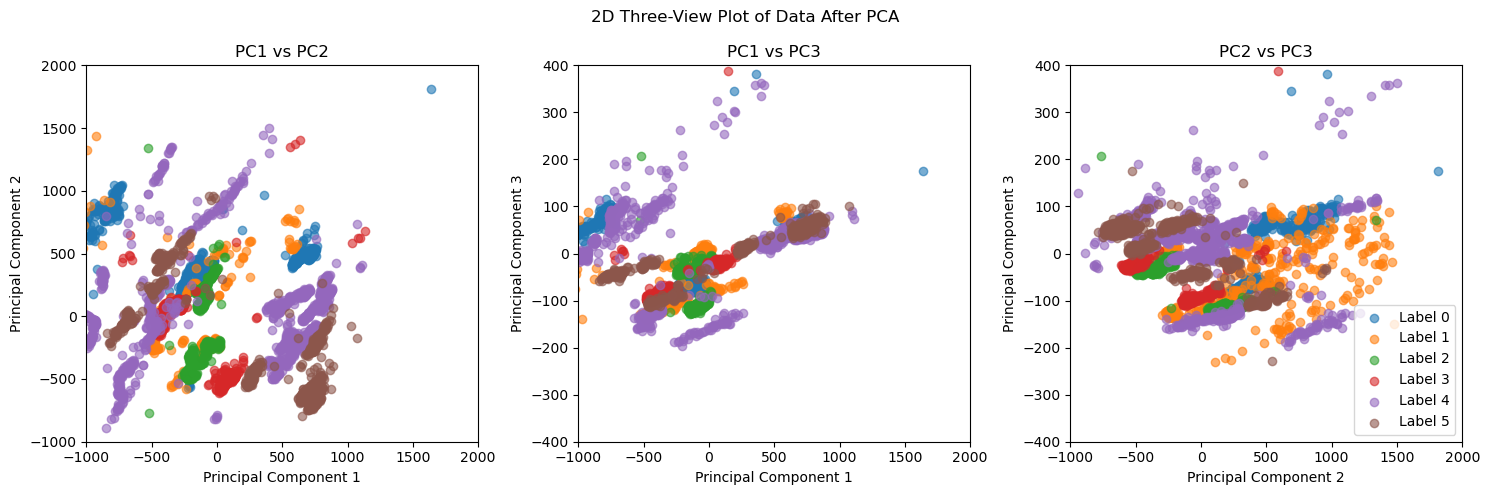

In [50]:
import matplotlib.pyplot as plt

def plot_2d_three_views(data_pca, labels):
    plt.figure(figsize=(15, 5))

    x_limit = (-1000, 2000)
    y_limit_pc2 = (-1000, 2000)
    y_limit_pc3 = (-400, 400)

    # PC1 vs PC2
    plt.subplot(1, 3, 1)
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(data_pca[indices, 0], data_pca[indices, 1], label=f"Label {label}", alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PC1 vs PC2")
    plt.xlim(x_limit)
    plt.ylim(y_limit_pc2)
    
    # PC1 vs PC3
    plt.subplot(1, 3, 2)
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(data_pca[indices, 0], data_pca[indices, 2], label=f"Label {label}", alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 3")
    plt.title("PC1 vs PC3")
    plt.xlim(x_limit)
    plt.ylim(y_limit_pc3)

    # PC2 vs PC3
    plt.subplot(1, 3, 3)
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(data_pca[indices, 1], data_pca[indices, 2], label=f"Label {label}", alpha=0.6)
    plt.xlabel("Principal Component 2")
    plt.ylabel("Principal Component 3")
    plt.title("PC2 vs PC3")
    plt.xlim(x_limit)
    plt.ylim(y_limit_pc3)

    # Add legend and show plot
    plt.legend()
    plt.suptitle("2D Three-View Plot of Data After PCA")
    plt.tight_layout()
    plt.show()

# Use the function to plot
plot_2d_three_views(data_pca_under, labels_under)


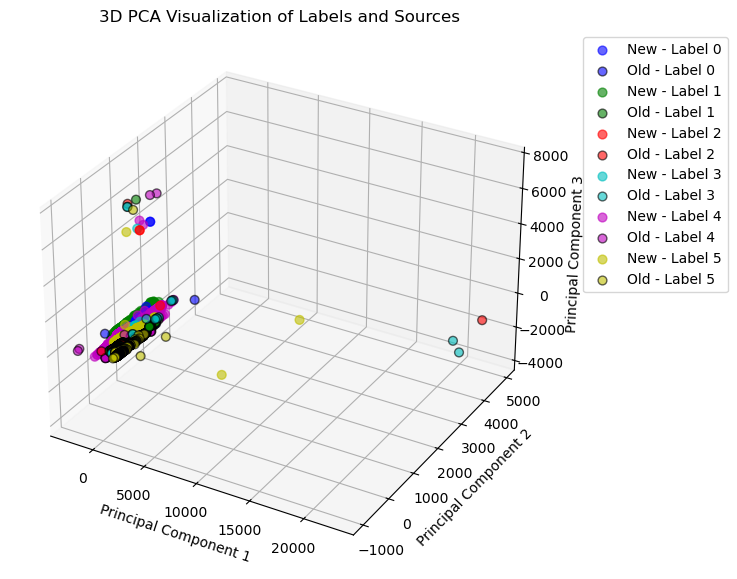

In [51]:
import os 
import sys
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sys.path.append(r"c:\Users\keng-tse\Desktop\csi_tool") # 絕對路徑請依需求修改
import csi_tool

# 載入數據和標籤
files_labels = {
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\2p.xlsx": 2,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\3p.xlsx": 3,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\4p.xlsx": 4,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\5p.xlsx": 5,
}
test_labels = {
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\2p.xlsx": 2,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\3p.xlsx": 3,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\4p.xlsx": 4,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\5p.xlsx": 5,
}

def load_data(files_labels, source_label):
    data = []
    labels = []
    source = []
    
    for file, label in files_labels.items():
        df = pd.read_excel(file)
        data.append(df.values)
        labels.extend([label] * len(df))  # 為每列設定標籤
        source.extend([source_label] * len(df))  # 為每列設定來源標籤
    
    data = pd.DataFrame(np.vstack(data))  # 垂直合併數據
    labels = pd.Series(labels)
    source = pd.Series(source)
    return data, labels, source

# 載入舊資料和新資料
data_old, labels_old, source_old = load_data(files_labels, 'Old')
data_new, labels_new, source_new = load_data(test_labels, 'New')

# 合併資料
combined_data = pd.concat([data_old, data_new], axis=0, ignore_index=True)
combined_labels = pd.concat([labels_old, labels_new], axis=0, ignore_index=True)
combined_source = pd.concat([source_old, source_new], axis=0, ignore_index=True)

# PCA 降維到三維
n_components = 3
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(combined_data)

# 將結果轉為 DataFrame 並加入標籤和來源
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca_df['Label'] = combined_labels.values
data_pca_df['Source'] = combined_source.values

# 定義顏色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 3D 可視化不同標籤和來源的分布
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in data_pca_df['Label'].unique():
    # 新的資料：顏色無外框
    subset_new = data_pca_df[(data_pca_df['Source'] == 'New') & (data_pca_df['Label'] == label)]
    ax.scatter(subset_new['PC1'], subset_new['PC2'], subset_new['PC3'], 
               color=colors[label % len(colors)], label=f"New - Label {label}", s=40, alpha=0.6)
    
    # 舊的資料：顏色相同但加上黑色外框
    subset_old = data_pca_df[(data_pca_df['Source'] == 'Old') & (data_pca_df['Label'] == label)]
    ax.scatter(subset_old['PC1'], subset_old['PC2'], subset_old['PC3'], 
               facecolor=colors[label % len(colors)], edgecolor='k', label=f"Old - Label {label}", s=40, alpha=0.6)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization of Labels and Sources")
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


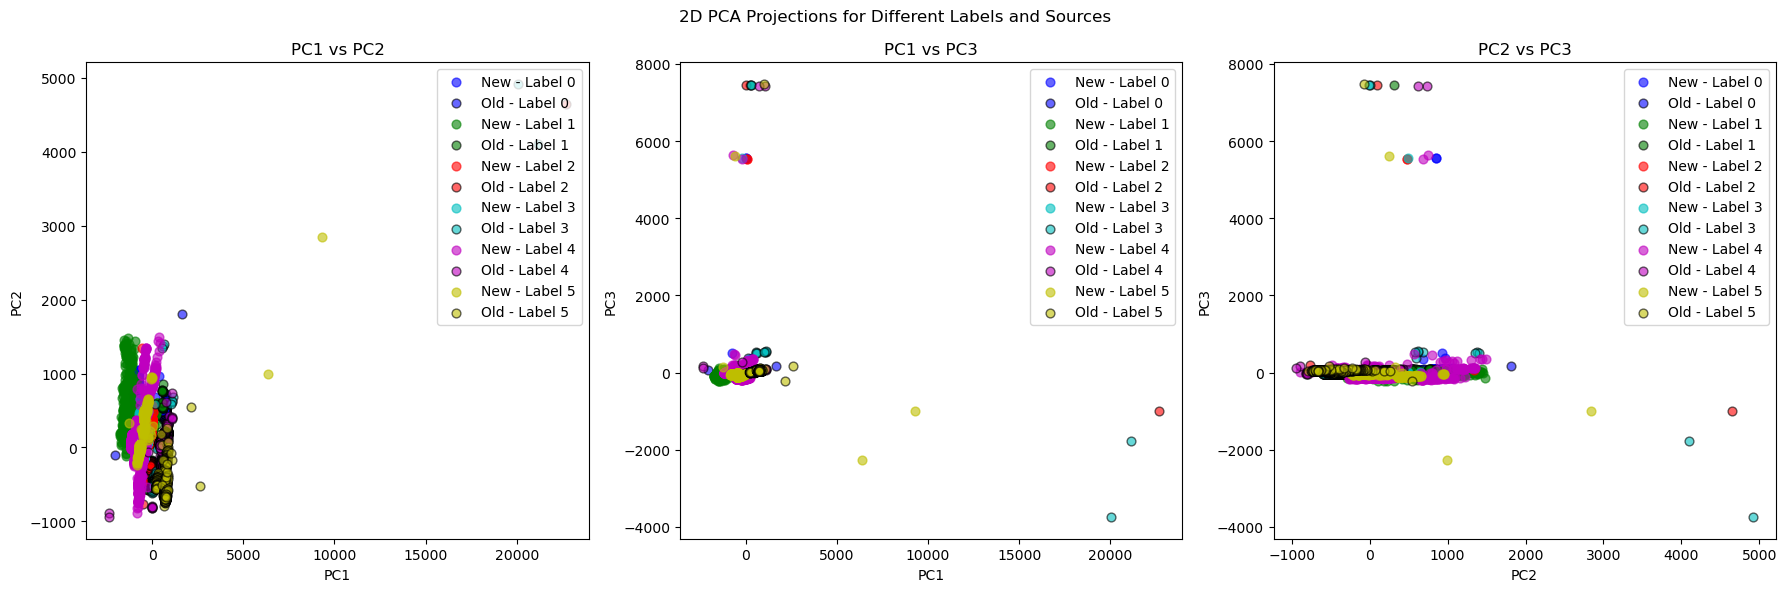

In [52]:
import os 
import sys
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

sys.path.append(r"c:\Users\keng-tse\Desktop\csi_tool") # 絕對路徑請依需求修改
import csi_tool

# 載入數據和標籤
files_labels = {
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\2p.xlsx": 2,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\3p.xlsx": 3,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\4p.xlsx": 4,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\5p.xlsx": 5,
}
test_labels = {
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\2p.xlsx": 2,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\3p.xlsx": 3,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\4p.xlsx": 4,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under\5p.xlsx": 5,
}

def load_data(files_labels, source_label):
    data = []
    labels = []
    source = []
    
    for file, label in files_labels.items():
        df = pd.read_excel(file)
        data.append(df.values)
        labels.extend([label] * len(df))  # 為每列設定標籤
        source.extend([source_label] * len(df))  # 為每列設定來源標籤
    
    data = pd.DataFrame(np.vstack(data))  # 垂直合併數據
    labels = pd.Series(labels)
    source = pd.Series(source)
    return data, labels, source

# 載入舊資料和新資料
data_old, labels_old, source_old = load_data(files_labels, 'Old')
data_new, labels_new, source_new = load_data(test_labels, 'New')

# 合併資料
combined_data = pd.concat([data_old, data_new], axis=0, ignore_index=True)
combined_labels = pd.concat([labels_old, labels_new], axis=0, ignore_index=True)
combined_source = pd.concat([source_old, source_new], axis=0, ignore_index=True)

# PCA 降維到三維
n_components = 3
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(combined_data)

# 將結果轉為 DataFrame 並加入標籤和來源
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca_df['Label'] = combined_labels.values
data_pca_df['Source'] = combined_source.values

# 定義顏色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 創建子圖
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 定義視角（XY, XZ, YZ）
view_pairs = [('PC1', 'PC2'), ('PC1', 'PC3'), ('PC2', 'PC3')]
titles = ['PC1 vs PC2', 'PC1 vs PC3', 'PC2 vs PC3']

for ax, (x, y), title in zip(axes, view_pairs, titles):
    for label in data_pca_df['Label'].unique():
        # 新資料（無外框）
        subset_new = data_pca_df[(data_pca_df['Source'] == 'New') & (data_pca_df['Label'] == label)]
        ax.scatter(subset_new[x], subset_new[y], 
                   color=colors[label % len(colors)], label=f"New - Label {label}", s=40, alpha=0.6)
        
        # 舊資料（有外框）
        subset_old = data_pca_df[(data_pca_df['Source'] == 'Old') & (data_pca_df['Label'] == label)]
        ax.scatter(subset_old[x], subset_old[y], 
                   facecolor=colors[label % len(colors)], edgecolor='k', label=f"Old - Label {label}", s=40, alpha=0.6)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)
    ax.legend(loc='upper right')

plt.suptitle("2D PCA Projections for Different Labels and Sources")
plt.tight_layout()
plt.show()


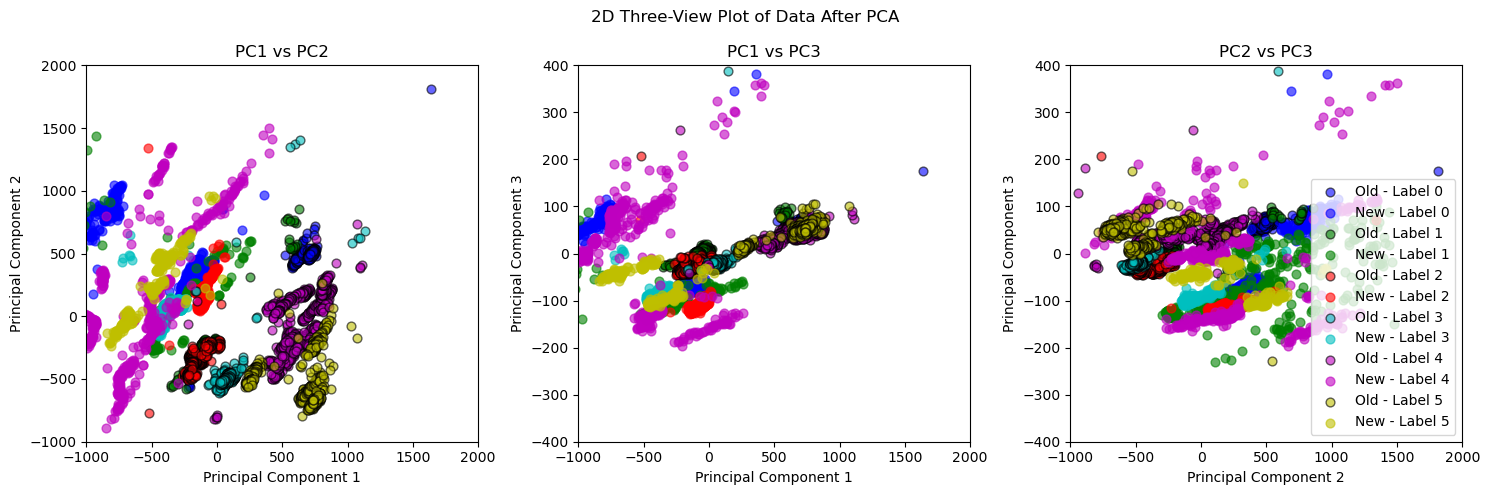

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_three_views(data_pca, labels, source):
    plt.figure(figsize=(15, 5))

    x_limit = (-1000, 2000)  # x軸限制
    y_limit_pc2 = (-1000, 2000)  # PC2 的 y軸限制
    y_limit_pc3 = (-400, 400)  # PC3 的 y軸限制

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # PC1 vs PC2
    plt.subplot(1, 3, 1)
    for label in np.unique(labels):
        indices_old = (labels == label) & (source == 'Old')
        indices_new = (labels == label) & (source == 'New')
        
        # 舊資料（有外框）
        plt.scatter(data_pca[indices_old, 0], data_pca[indices_old, 1], 
                    label=f"Old - Label {label}", color=colors[label % len(colors)], alpha=0.6, edgecolor='k', s=40)
        
        # 新資料（無外框）
        plt.scatter(data_pca[indices_new, 0], data_pca[indices_new, 1], 
                    label=f"New - Label {label}", color=colors[label % len(colors)],  alpha=0.6, s=40)
        
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PC1 vs PC2")
    plt.xlim(x_limit)
    plt.ylim(y_limit_pc2)

    # PC1 vs PC3
    plt.subplot(1, 3, 2)
    for label in np.unique(labels):
        indices_old = (labels == label) & (source == 'Old')
        indices_new = (labels == label) & (source == 'New')
        
        plt.scatter(data_pca[indices_old, 0], data_pca[indices_old, 2], 
                    label=f"Old - Label {label}",color=colors[label % len(colors)], alpha=0.6, edgecolor='k', s=40)
        
        plt.scatter(data_pca[indices_new, 0], data_pca[indices_new, 2], 
                    label=f"New - Label {label}",color=colors[label % len(colors)], alpha=0.6, s=40)
        
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 3")
    plt.title("PC1 vs PC3")
    plt.xlim(x_limit)
    plt.ylim(y_limit_pc3)

    # PC2 vs PC3
    plt.subplot(1, 3, 3)
    for label in np.unique(labels):
        indices_old = (labels == label) & (source == 'Old')
        indices_new = (labels == label) & (source == 'New')
        
        plt.scatter(data_pca[indices_old, 1], data_pca[indices_old, 2], 
                    label=f"Old - Label {label}",color=colors[label % len(colors)], alpha=0.6, edgecolor='k', s=40)
        
        plt.scatter(data_pca[indices_new, 1], data_pca[indices_new, 2], 
                    label=f"New - Label {label}",color=colors[label % len(colors)], alpha=0.6, s=40)
        
    plt.xlabel("Principal Component 2")
    plt.ylabel("Principal Component 3")
    plt.title("PC2 vs PC3")
    plt.xlim(x_limit)
    plt.ylim(y_limit_pc3)

    # Add legend and show plot
    plt.legend()
    plt.suptitle("2D Three-View Plot of Data After PCA")
    plt.tight_layout()
    plt.show()

# 使用資料進行繪圖
plot_2d_three_views(data_pca, combined_labels, combined_source)


In [59]:
#  如果只觀察有人還是沒人

In [75]:
files_labels2 = {
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\2p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\3p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\4p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_dataset\peoplecounting\1023_all\5p.xlsx": 1,
}

test_labels2 = {
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\0p.xlsx": 0,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\1p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\2p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\3p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\4p.xlsx": 1,
    r"C:\Users\keng-tse\Desktop\csi_tool\csi_dataset\peoplecounting\1107_under_all\5p.xlsx": 1,

}

In [121]:
import pandas as pd
import numpy as np

def load_data_fix_size(files_labels, max_samples_per_label=200):
    data = []
    labels = []

    # 初始化一個字典來儲存每個標籤的資料
    label_data = {0: [], 1: []}

    for file, label in files_labels.items():
        df = pd.read_excel(file)
        
        # 根據標籤將資料分類
        if label == 0 or label == 1:
            label_data[label].append(df.values)
        
    # 限制標籤為 0 和 1 的資料筆數最多為 max_samples_per_label
    for label in label_data:
        # 隨機抽樣，最多選擇 200 筆資料
        label_data[label] = np.vstack(label_data[label])
        if label_data[label].shape[0] > max_samples_per_label:
            np.random.shuffle(label_data[label])  # 打亂資料
            label_data[label] = label_data[label][:max_samples_per_label]

    # 將標籤 0 和 1 的資料合併
    for label in label_data:
        data.append(label_data[label])
        labels.extend([label] * len(label_data[label]))

    # 合併所有資料
    data = pd.DataFrame(np.vstack(data))  # Stack data vertically
    labels = pd.Series(labels)

    print(f"Data shape: {data.shape}")
    print(f"Labels distribution: {labels.value_counts()}")

    return data, labels

# 載入數據
data_scaled1, labels1 = load_data(files_labels2)
data_scaled2, labels2 = load_data_fix_size(test_labels2)
# Concatenate the data DataFrames and label Series
data_scaled_mix = pd.concat([data_scaled, data_scaled_under], axis=0, ignore_index=True)
labels_mix = pd.concat([labels, labels_under], axis=0, ignore_index=True)

              0           1           2           3           4           5   \
0     294.703241  299.766576  304.507800  312.827428  310.961412  330.492057   
1     300.566132  303.211148  306.757233  302.483057  309.583591  330.629702   
2     299.821614  302.654919  301.303833  306.887602  307.605267  327.940543   
3     294.966100  302.364019  304.138127  307.883095  309.457590  328.811496   
4     435.983945  433.018475  438.346895  439.602093  454.757078  480.010417   
...          ...         ...         ...         ...         ...         ...   
4117  480.417527  480.884602  479.963540  478.658542  478.724347  478.452714   
4118  493.328491  485.000000  478.023012  473.600042  481.009355  482.346349   
4119  487.017453  489.540601  485.759200  479.009394  474.368001  477.177116   
4120  491.562814  486.065839  484.372790  480.550726  478.271889  474.843132   
4121  486.054524  488.878308  483.205960  478.150604  473.469112  483.662072   

              6           7           8

In [122]:
#n_components = 40  # 要保留的主成分數量
#pca = PCA(n_components=n_components)
#data_pca = pca.fit_transform(data_scaled)
#data_scaled1 = pca.fit_transform(data_scaled1)



X_train, X_test, y_train, y_test = train_test_split(data_scaled1, labels1, test_size=0.1, random_state=2)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

#data_scaled2 = pca.fit_transform(data_scaled2)

y_pred2 = xgb_model.predict(data_scaled2)

# 混淆矩陣和準確率
cm = confusion_matrix(labels2, y_pred2)
accuracy = accuracy_score(labels2, y_pred2)
    
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(labels2, y_pred2)
print("Classification Report:\n", report)


Confusion Matrix:
 [[147  53]
 [ 14 186]]
Accuracy: 83.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       200
           1       0.78      0.93      0.85       200

    accuracy                           0.83       400
   macro avg       0.85      0.83      0.83       400
weighted avg       0.85      0.83      0.83       400

